In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score , KFold

#from sklearn import linear_model, cross_validation

In [4]:
df = pd.read_csv('/home/amal/Téléchargements/train1.csv')

print(df.isnull().values.sum().sum())  # check if any value is Null in DataFrame
features = list(df.columns[1:94])
classe = df['target']
attribus = df[features]



0


In [4]:
#X_train, X_test, y_train, y_test = train_test_split( attribus, classe, test_size=0.1, random_state=0)

In [ ]:

from sklearn.feature_selection import SelectFromModel
rfe = RandomForestClassifier()
rfe.fit(attribus, classe)
rfe.feature_importances_  
model = SelectFromModel(rfe, prefit=True)
X_new = model.transform(attribus)
X_new.shape               



In [70]:
#https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
    
max_features = [15, 16  , 30, 40 , 50 , 60, 70 , 80 , 90 ]
k_scores = []
k_scores1 = []
k_scores2 = []
for feature in max_features:
    rf = RandomForestClassifier(n_estimators=10 ,max_features=feature)
    scores = cross_val_score(rf, attribus,classe,  cv=10, scoring = 'accuracy')
    scores1 = cross_val_score(rf, attribus,classe,  cv=10, scoring = 'precision_micro')
    scores2 = cross_val_score(rf, attribus,classe,  cv=10, scoring = 'recall_micro')
    k_scores.append(scores.mean())
    k_scores1.append(scores1.mean())
    k_scores2.append(scores2.mean())
print k_scores
print k_scores1
print k_scores2


                       




[0.78840757422321672, 0.78847148647734699, 0.7886168850722669, 0.78884313230591929, 0.78848826355842283, 0.78861739177852486]
[0.78863368791483102, 0.7872431253103831, 0.79003954625060746, 0.78818193061795738, 0.78861786221094354, 0.7899428406759309]
[0.79008824928731325, 0.78934527190210213, 0.78858561461858079, 0.78835912154738741, 0.78970053757996062, 0.7883584480010567]


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(max_features ,k_scores)
plt.xlabel ('number of dimensions')
plt.ylabel('score')

NameError: name 'max_features' is not defined

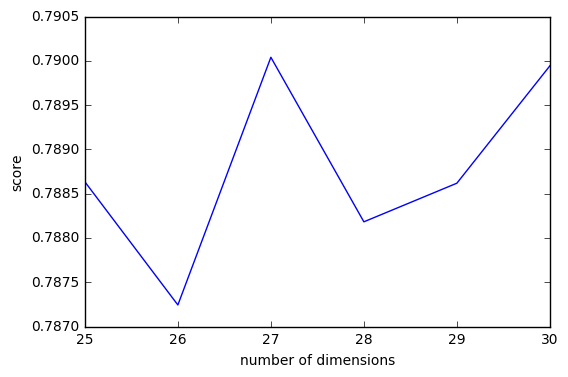

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(max_features ,k_scores1)
plt.xlabel ('number of dimensions')
plt.ylabel('score')

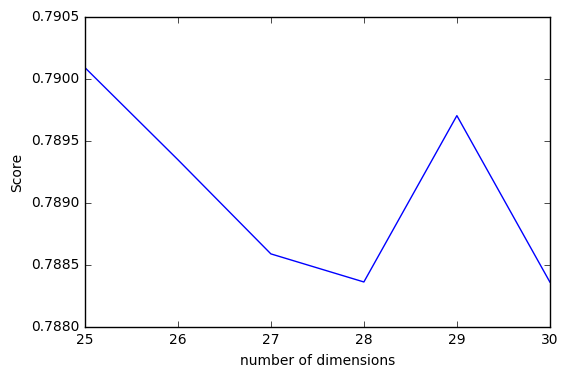

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(max_features ,k_scores2)
plt.xlabel ('number of dimensions')
plt.ylabel('Score')

In [5]:
#rf.fit(X_train, y_train) # fit the data to the algorithm
#1.b. n_estimators :
#This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value
#as your processor can handle because this makes your predictions stronger and more stable.

# choose the precision i need to improove who are true positive

rfe = RandomForestClassifier(n_estimators=10 ,max_features=25, min_samples_leaf =1, min_samples_split =5)
rfe.fit(attribus, classe)
print("score d'entrainement:", rfe.score(attribus,classe))
#scores = cross_val_score(rfe, attribus,classe,  cv=10, scoring = 'accuracy')
#print scores.mean()

("score d'entrainement:", 0.97459517114321725)


In [29]:
#rf.fit(X_train,y_train,)
#dec = rf.predict(X_test)
#print (' accuracy is ' , accuracy_score(y_test,dec))

#print(rf.score(X_test, y_test))

In [6]:
df1 = pd.read_csv('/home/amal/Téléchargements/test.csv')
test_data = df1.as_matrix()
test_data = np.delete(test_data, 0 , axis=1)
#print(test_data)
#print (test_data.shape)
print 'predict result is: '
prediction= rfe.predict(test_data)
#print(prediction)
print (prediction)
print(prediction.shape)

predict result is: 
[4 6 6 ..., 3 2 2]
(144368,)


In [7]:
#submission file
tmp_array = [0,0,0,0,0,0,0,0,0,0]
output_matrix = []
for i in range(0,prediction.shape[0]):
    tmp_array[prediction[i]]=1
    tmp_array[0]=i+1
    output_matrix.append(tmp_array[0:10])
    tmp_array[prediction[i]] = 0
print(np.array(output_matrix))
np.savetxt("/home/amal/random_search_l10_.csv", np.array(output_matrix), fmt='%i', delimiter="," , header='id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9', comments='')

[[     1      0      0 ...,      0      0      0]
 [     2      0      0 ...,      0      0      0]
 [     3      0      0 ...,      0      0      0]
 ..., 
 [144366      0      0 ...,      0      0      0]
 [144367      0      1 ...,      0      0      0]
 [144368      0      1 ...,      0      0      0]]
